# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import seaborn.objects as so

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,2))
    
    @functools.cached_property
    def distances(self):
        return np.array([np.sqrt(np.sum((x- self.points)**2, axis=1)) for x in self.points])

    @functools.cached_property
    def adj(self):
        mask = self.distances < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    
    def n_comp(self):
        def dfs(gr,s):
            for v in gr[s]:
                if v not in self.parent:
                    self.parent[v]=s
                    dfs(gr,v)
        self.parent = {}
        res = 0
        for i in range(self.n):
            if i not in self.parent:
                res+=1
                self.parent[i]=None
                dfs(self.adj,i)
        return res

In [ ]:
rgg = RGG(10,0.3)

In [ ]:
rgg.adj

{0: [4],
 1: [5, 9],
 2: [5],
 3: [],
 4: [0, 6, 8],
 5: [1, 2],
 6: [4, 8],
 7: [],
 8: [4, 6],
 9: [1]}

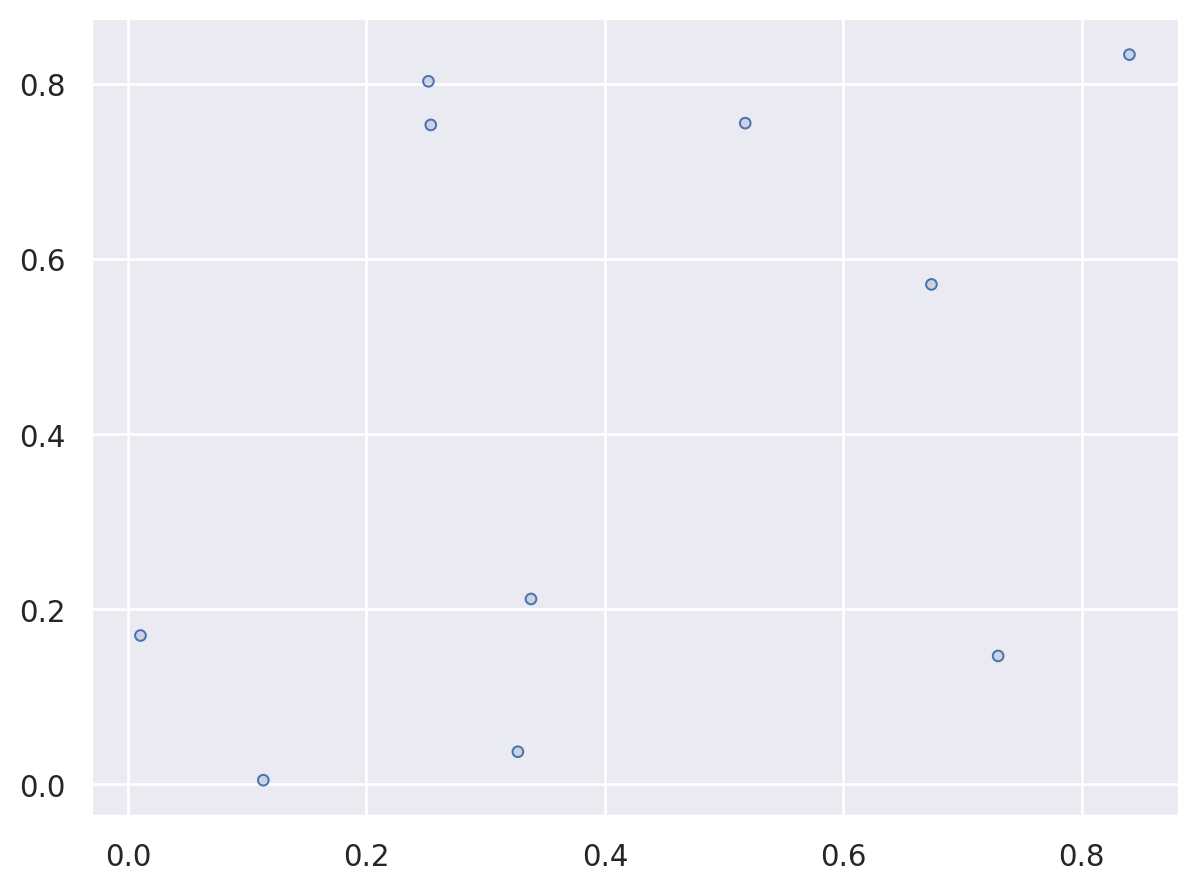

In [ ]:
p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.n_comp()

4

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()